In [1]:
# import all relevant libraries and functions
from create_cells import plot_spherocylinder, generate_spherocylinder_mask, poisson_noise_inside_outline
from spatial_organisation import spatial_organisation_line, spatial_organisation_along_length
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import imageio.v3 as iio



For a synthetic cell line analysis and spatial distribution analysis

In [2]:
#create a synthetic mask and image cell to evaluate
L, R, phi, pixel_size = 100, 25, np.pi/4, 0.2 
outline_x, outline_y = plot_spherocylinder(L, R, phi)
generated_mask, extent = generate_spherocylinder_mask(outline_x, outline_y, 0.2)


L_inner, R_inner, phi_inner = 50, 13, np.pi/4
inner_x, inner_y = plot_spherocylinder(L_inner, R_inner, phi_inner)
x_points, y_points, intensities = poisson_noise_inside_outline(inner_x, inner_y, lam=5, num_points=1000)
#the fig_1 is the mask and the fig_2 is the image
fig_1, ax_1 = plt.subplots(figsize=(6, 6),facecolor='black')
fig_2, ax_2 = plt.subplots(figsize=(6, 6),facecolor='black')

ax_1.set_facecolor("black")
ax_2.set_facecolor("black")



ax_1.imshow(generated_mask, cmap='gray', extent=extent, origin='lower')
ax_1.axis('off')

# Set limits manually using extent to preserve correct scaling
ax_2.set_xlim(extent[0], extent[1])
ax_2.set_ylim(extent[2], extent[3])

ax_2.scatter(x_points, y_points, c=intensities, cmap='gray', alpha=0.7)
ax_2.set_aspect('equal')

canvas = FigureCanvas(fig_1)
canvas.draw()

buffer_rgba_mask = np.array(canvas.buffer_rgba())  # Store as an RGBA image array
grayscale = buffer_rgba_mask[..., :3].mean(axis=-1)  # Average over RGB channels
# Threshold image (anything > 128 becomes white, else black)
mask = (grayscale > 128).astype(np.uint8)

plt.close(fig_1)  # Close plot t

canvas = FigureCanvas(fig_2)
canvas.draw()

buffer_rgba_image = np.array(canvas.buffer_rgba())  # Store as an RGBA image array
image = buffer_rgba_image[..., :3].mean(axis=-1).astype(np.uint8)  # Average over RGB channels
image = 1- image
plt.close(fig_2)


[-2. -2. -2. ... 49. 49. 49.]


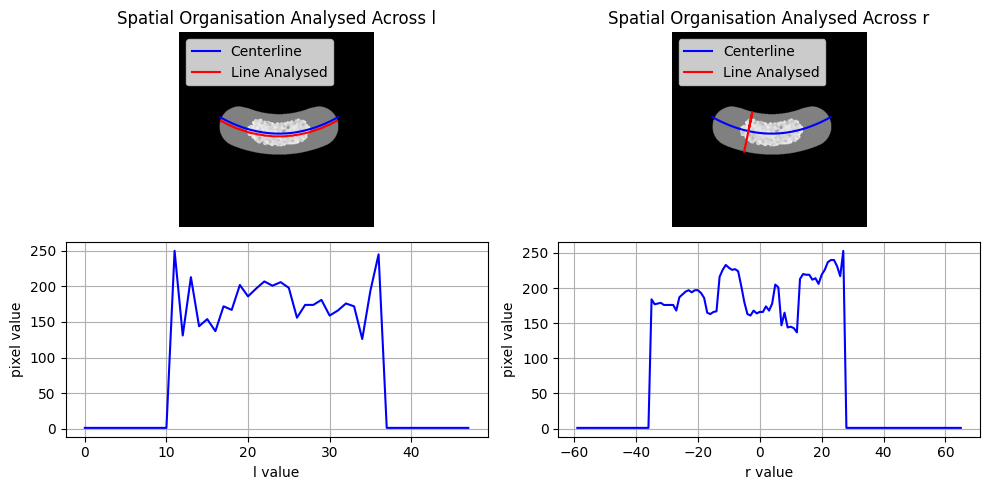

In [3]:

spatial_organisation_line(mask, image, 10, 16)

[-2. -2. -2. ... 49. 49. 49.]


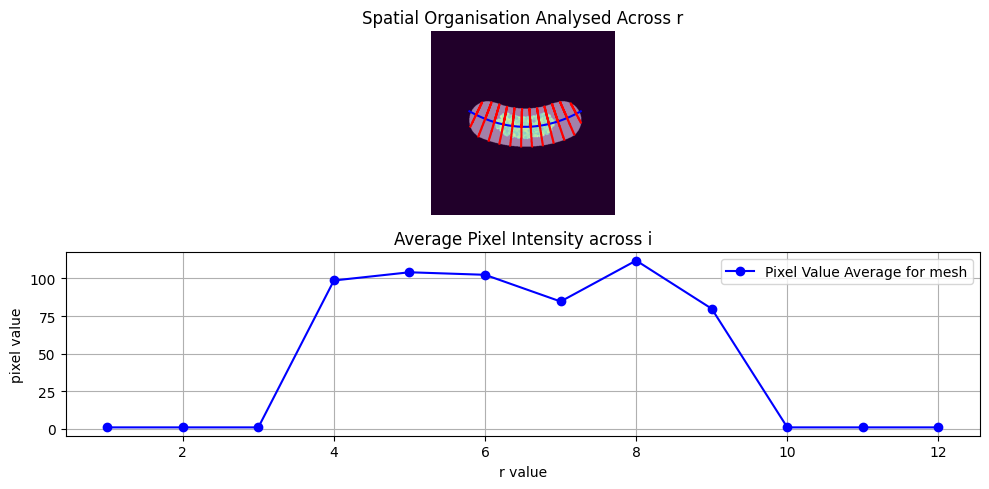

In [4]:
spatial_organisation_along_length(mask, image)

Do the same analysis on real data 

In [5]:
#Load some real data
masks_real = iio.imread("synthetic_data/masks/Nonesynth_00000.png")
image_real = iio.imread("synthetic_data/convolutions/Nonesynth_00000.png")
rotated_image = np.rot90(image_real, 1)
rotated_mask = np.rot90(masks_real, 1)
mask_1_real = (rotated_mask==(1)).astype(np.uint8)
mask_2_real = (rotated_mask==(2)).astype(np.uint8)
mask_3_real = (rotated_mask==(3)).astype(np.uint8)
image_1_real = rotated_image*mask_1_real
image_2_real  =rotated_image*mask_2_real 
image_3_real = rotated_image*mask_3_real


[ -1.   1.   1.   1.   1.  -2.  -2.  -2.  -2.  -2.   2.   2.   2.   2.
   2.   2.   2.  -3.  -3.  -3.  -3.  -3.  -3.  -3.   3.   3.   3.   3.
   3.   3.   3.   3.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.   4.   4.
   4.   4.   4.   4.   4.   4.   4.  -5.  -5.  -5.  -5.  -5.  -5.  -5.
  -5.  -5.   5.   5.   5.   5.   5.   5.   5.   5.   5.  -6.  -6.  -6.
  -6.  -6.  -6.  -6.  -6.  -6.  -6.   6.   6.   6.   6.   6.   6.   6.
   6.   6.  -7.  -7.  -7.  -7.  -7.  -7.  -7.  -7.  -7.   7.   7.   7.
   7.   7.   7.   7.   7.   7.   7.  -8.  -8.  -8.  -8.  -8.  -8.  -8.
  -8.  -8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.  -9.  -9.
  -9.  -9.  -9.  -9.  -9.  -9.  -9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9. -10. -10. -10. -10. -10. -10. -10. -10. -10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10. -11. -11. -11. -11. -11. -11.
 -11. -11. -11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11. -12.
 -12. -12. -12. -12. -12. -12. -12. -12.  12.  12.  12.  12.  12.  12.
  12. 

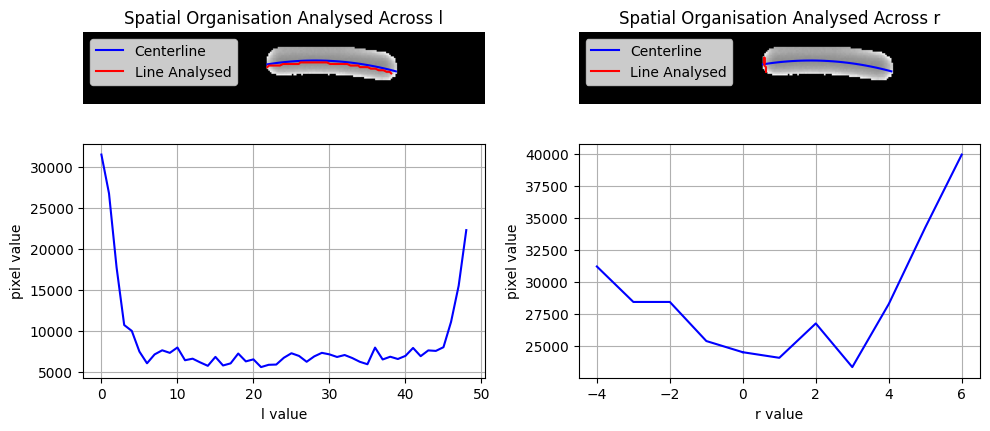

In [6]:
spatial_organisation_line(mask_1_real, image_1_real, 3, 2)

[ -1.   1.   1.   1.   1.  -2.  -2.  -2.  -2.  -2.   2.   2.   2.   2.
   2.   2.   2.  -3.  -3.  -3.  -3.  -3.  -3.  -3.   3.   3.   3.   3.
   3.   3.   3.   3.  -4.  -4.  -4.  -4.  -4.  -4.  -4.  -4.   4.   4.
   4.   4.   4.   4.   4.   4.   4.  -5.  -5.  -5.  -5.  -5.  -5.  -5.
  -5.  -5.   5.   5.   5.   5.   5.   5.   5.   5.   5.  -6.  -6.  -6.
  -6.  -6.  -6.  -6.  -6.  -6.  -6.   6.   6.   6.   6.   6.   6.   6.
   6.   6.  -7.  -7.  -7.  -7.  -7.  -7.  -7.  -7.  -7.   7.   7.   7.
   7.   7.   7.   7.   7.   7.   7.  -8.  -8.  -8.  -8.  -8.  -8.  -8.
  -8.  -8.   8.   8.   8.   8.   8.   8.   8.   8.   8.   8.  -9.  -9.
  -9.  -9.  -9.  -9.  -9.  -9.  -9.   9.   9.   9.   9.   9.   9.   9.
   9.   9.   9. -10. -10. -10. -10. -10. -10. -10. -10. -10.  10.  10.
  10.  10.  10.  10.  10.  10.  10.  10. -11. -11. -11. -11. -11. -11.
 -11. -11. -11.  11.  11.  11.  11.  11.  11.  11.  11.  11.  11. -12.
 -12. -12. -12. -12. -12. -12. -12. -12.  12.  12.  12.  12.  12.  12.
  12. 

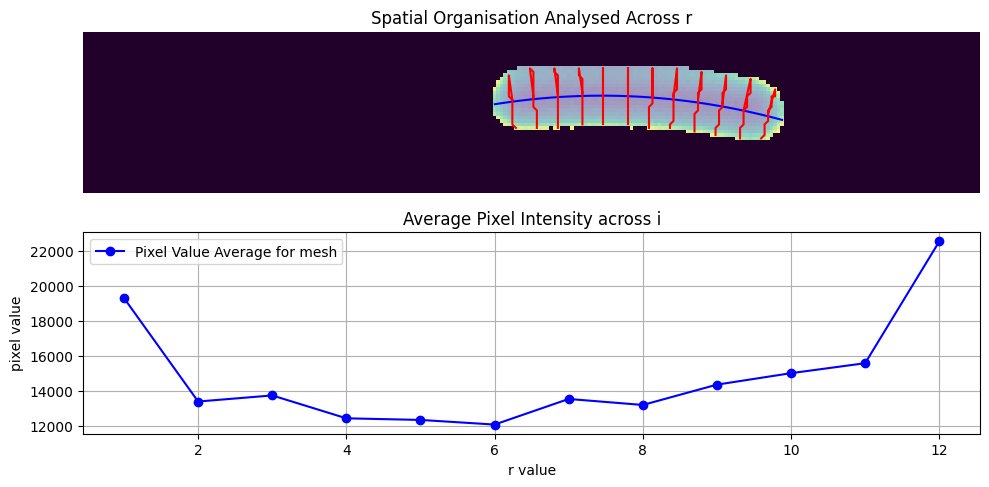

In [8]:
spatial_organisation_along_length(mask_1_real, image_1_real)